In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('osm/amenities-vancouver.json.gz', lines=True)

In [3]:
df

,lat,lon,timestamp,amenity,name,tags
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ..."
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...
2,49.373423,-123.291894,2016-10-10T02:14:29.000-07:00,toilets,NaN,{}
3,49.249848,-122.959708,2011-09-06T03:52:10.000-07:00,bbq,NaN,{}
4,49.370898,-123.280448,2015-05-03T00:42:25.000-07:00,place_of_worship,St. Monica's Anglican Church,"{'addr:housenumber': '6404', 'addr:street': 'W..."
...,...,...,...,...,...,...
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{}
17714,49.278770,-122.797628,2013-03-26T23:45:49.000-07:00,restaurant,Togo Sushi,{'cuisine': 'japanese'}
17715,49.276443,-122.790138,2013-03-26T23:45:50.000-07:00,parking,NaN,{}
17716,49.282666,-122.826978,2019-09-13T13:56:49.000-07:00,pub,Brown's Social House,"{'addr:housenumber': '215', 'brewery': 'Guinne..."


In [4]:
am_count = df.groupby(['amenity']).count()

In [5]:
pd.set_option('display.max_rows', 139)
print(am_count[am_count['lat'] > 20])
pd.set_option('display.max_rows', 10)

                   lat   lon  timestamp  name  tags
amenity                                            
atm                 98    98         98     8    98
bank               460   460        460   458   460
bar                177   177        177   173   177
bench             3738  3738       3738    95  3738
bicycle_parking   1423  1423       1423     3  1423
bicycle_rental     202   202        202   201   202
bureau_de_change    23    23         23    20    23
cafe              1066  1066       1066  1055  1066
car_rental          33    33         33    33    33
car_sharing        132   132        132     9   132
car_wash            31    31         31    20    31
charging_station    63    63         63    18    63
childcare           47    47         47    43    47
clinic             120   120        120   114   120
college             23    23         23    23    23
community_centre    63    63         63    58    63
dentist            248   248        248   226   248
doctors     

In [6]:
pd.set_option('display.max_rows', 139)
print(df.groupby(['amenity']).count())
pd.set_option('display.max_rows', 10)

                         lat   lon  timestamp  name  tags
amenity                                                  
ATLAS_clean_room           1     1          1     0     1
EVSE                       1     1          1     0     1
Observation Platform       1     1          1     0     1
Pharmacy                   2     2          2     2     2
animal_shelter             4     4          4     4     4
arts_centre               11    11         11    11    11
atm                       98    98         98     8    98
atm;bank                   1     1          1     1     1
bank                     460   460        460   458   460
bar                      177   177        177   173   177
bbq                        7     7          7     0     7
bench                   3738  3738       3738    95  3738
bicycle_parking         1423  1423       1423     3  1423
bicycle_rental           202   202        202   201   202
bicycle_repair_station    19    19         19     2    19
biergarten    

In [7]:
interesting_amenities = ['arts_centre','boat_rental','car_rental','casino','cinema']

In [8]:
df['tags'].loc[1531]

{'wheelchair': 'yes',
 'addr:housenumber': '305',
 'historic': 'monument',
 'visibility': 'street',
 'display': 'analog',
 'tourism': 'attraction',
 'addr:street': 'Water Street',
 'wikipedia': 'en:Steam clock#Gastown steam clock',
 'wikidata': 'Q477663',
 'support': 'ground'}

In [9]:
def is_common(amenity):
    common = ['waste_basket', 'toilets', 'bench']
    if amenity in common:
        return True
    else:
        return False

In [10]:
def is_tourism(tags):
    if 'tourism' in tags:
        return True
    else:
        return False

In [11]:
df['is_common'] = df['amenity'].apply(lambda x : is_common(x))

In [12]:
df['is_tourism'] = df['tags'].apply(lambda x : is_tourism(x))

In [13]:
df[(df['is_common'] == False) | (df['is_tourism'] == True)]

,lat,lon,timestamp,amenity,name,tags,is_common,is_tourism
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",False,False
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,False,False
3,49.249848,-122.959708,2011-09-06T03:52:10.000-07:00,bbq,NaN,{},False,False
4,49.370898,-123.280448,2015-05-03T00:42:25.000-07:00,place_of_worship,St. Monica's Anglican Church,"{'addr:housenumber': '6404', 'addr:street': 'W...",False,False
5,49.219983,-122.988481,2010-02-26T02:20:23.000-08:00,post_box,NaN,{'operator': 'Canada Post'},False,False
...,...,...,...,...,...,...,...,...
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{},False,False
17714,49.278770,-122.797628,2013-03-26T23:45:49.000-07:00,restaurant,Togo Sushi,{'cuisine': 'japanese'},False,False
17715,49.276443,-122.790138,2013-03-26T23:45:50.000-07:00,parking,NaN,{},False,False
17716,49.282666,-122.826978,2019-09-13T13:56:49.000-07:00,pub,Brown's Social House,"{'addr:housenumber': '215', 'brewery': 'Guinne...",False,False


In [14]:
df['is_interesting'] = (df['is_common'] == False) | (df['is_tourism'] == True)

In [15]:
pd.set_option('display.max_rows', 10)
print(df[df['amenity'] == 'fast_food'].groupby('name').count())
pd.set_option('display.max_rows', 10)

                               lat  lon  timestamp  amenity  tags  is_common  \
name                                                                           
2001 Flavors                     1    1          1        1     1          1   
24 Train Express Noodle House    1    1          1        1     1          1   
4 Brothers' Pizza                1    1          1        1     1          1   
76 Pizza                         1    1          1        1     1          1   
99 Bbq                           1    1          1        1     1          1   
...                            ...  ...        ...      ...   ...        ...   
ono's of Japan                   1    1          1        1     1          1   
panago                           1    1          1        1     1          1   
rasoee                           1    1          1        1     1          1   
strEATS Aldergrove               1    1          1        1     1          1   
敘香園                              1    1 

In [16]:
path_points = pd.read_csv('path.csv')

In [17]:
path_points

,lat,lon
0,49.28548,-123.11959
1,49.28453,-123.12116
2,49.28372,-123.12018
3,49.28316,-123.11906
4,49.28247,-123.11816
...,...,...
32,49.28208,-123.09822
33,49.28226,-123.09751
34,49.28311,-123.09749
35,49.28398,-123.09787


In [18]:
df[df['is_interesting'] == True]

,lat,lon,timestamp,amenity,name,tags,is_common,is_tourism,is_interesting
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ...",False,False,True
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...,False,False,True
3,49.249848,-122.959708,2011-09-06T03:52:10.000-07:00,bbq,NaN,{},False,False,True
4,49.370898,-123.280448,2015-05-03T00:42:25.000-07:00,place_of_worship,St. Monica's Anglican Church,"{'addr:housenumber': '6404', 'addr:street': 'W...",False,False,True
5,49.219983,-122.988481,2010-02-26T02:20:23.000-08:00,post_box,NaN,{'operator': 'Canada Post'},False,False,True
...,...,...,...,...,...,...,...,...,...
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{},False,False,True
17714,49.278770,-122.797628,2013-03-26T23:45:49.000-07:00,restaurant,Togo Sushi,{'cuisine': 'japanese'},False,False,True
17715,49.276443,-122.790138,2013-03-26T23:45:50.000-07:00,parking,NaN,{},False,False,True
17716,49.282666,-122.826978,2019-09-13T13:56:49.000-07:00,pub,Brown's Social House,"{'addr:housenumber': '215', 'brewery': 'Guinne...",False,False,True


In [19]:
interesting_amenities = df[df['is_interesting'] == True]

In [20]:
interesting_amenities.to_csv('interesting_amenities.csv')

In [21]:
# nearby_amenities = set()

In [22]:
# def add_amenity_if_nearby(distance):
#     threshold = 50
#     if distance < threshold:
#         nearby_amenities.add()

In [23]:
def distance(amenity, points):
    lat1 = amenity['lat']
    lat2 = points['lat']
    lon1 = amenity['lon']
    lon2 = points['lon']
    p = np.pi/180
    b = np.cos((lat2.sub(lat1)).mul(p)).div(2) #series
    c = np.cos(lat1*p) #number
    d = np.cos(lat2.mul(p)) #series
    e = np.subtract(1,np.cos((lon2.sub(lon1)).mul(p))).div(2) #series
    a = np.subtract(0.5, b).add((d.mul(c)).mul(e))
    
    distances = np.arcsin(np.sqrt(a)).mul(12742)
    nearest = distances.min()
    
    return nearest
# https://stackoverflow.com/a/21623206

In [24]:
distance(interesting_amenities.iloc[2], path_points)

10.628604207247239

In [25]:
interesting_amenities['nearest_point_distance'] = interesting_amenities.apply(lambda x: distance(x, path_points), axis=1)

<ipython-input-25-4eedab4e9157>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesting_amenities['nearest_point_distance'] = interesting_amenities.apply(lambda x: distance(x, path_points), axis=1)


In [26]:
nearby_amenities = interesting_amenities[interesting_amenities['nearest_point_distance'] < 0.1]
nearby_amenities

,lat,lon,timestamp,amenity,name,tags,is_common,is_tourism,is_interesting,nearest_point_distance
16,49.283192,-123.109050,2015-12-18T21:41:07.000-08:00,pub,The Cambie,"{'toilets:wheelchair': 'no', 'wheelchair': 'li...",False,False,True,0.043624
74,49.280504,-123.106872,2019-12-01T04:03:46.000-08:00,theatre,Cineplex Odeon International Village Cinemas,"{'addr:housenumber': '88', 'alt_name': 'Tinsel...",False,False,True,0.026294
304,49.283265,-123.097896,2019-09-13T13:57:03.000-07:00,restaurant,St Lawrence Restaurant,"{'addr:housenumber': '269', 'addr:street': 'Po...",False,False,True,0.034137
305,49.283288,-123.098074,2019-09-13T13:57:03.000-07:00,restaurant,Cuhillo,"{'addr:housenumber': '261', 'addr:street': 'Po...",False,False,True,0.046770
311,49.283164,-123.103531,2019-09-13T13:57:04.000-07:00,restaurant,The Sardine Can,"{'addr:housenumber': '26', 'addr:street': 'Pow...",False,False,True,0.048759
...,...,...,...,...,...,...,...,...,...,...
16504,49.281911,-123.113501,2019-09-13T13:56:49.000-07:00,restaurant,White Spot,"{'brand:wikidata': 'Q7995414', 'wheelchair': '...",False,False,True,0.029347
16609,49.282122,-123.112999,2018-07-04T23:52:14.000-07:00,charging_station,NaN,{'capacity': '2'},False,False,True,0.052734
16610,49.282186,-123.112894,2018-07-04T23:52:14.000-07:00,charging_station,NaN,{'capacity': '2'},False,False,True,0.042646
16713,49.283619,-123.119488,2014-07-03T08:34:42.000-07:00,bank,HSBC Bank Canada,{},False,False,True,0.051432


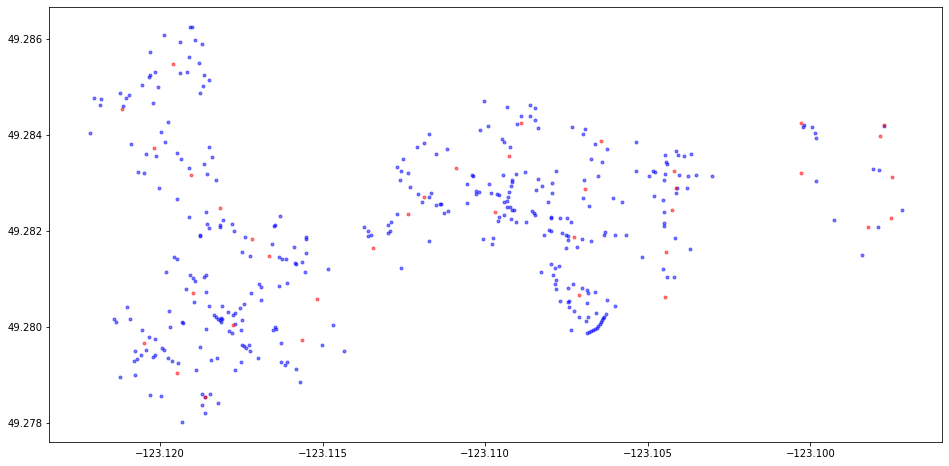

In [27]:
fig = plt.figure(figsize=(16, 8))
plt.plot(nearby_amenities['lon'], nearby_amenities['lat'], 'b.', alpha=0.5)
plt.plot(path_points['lon'], path_points['lat'], 'r.', alpha=0.5)
plt.show()

In [28]:
def output_gpx(points, output_filename):
    """
    Output a GPX file with latitude and longitude from the points DataFrame.
    """
    from xml.dom.minidom import getDOMImplementation
    def append_trkpt(pt, trkseg, doc):
        trkpt = doc.createElement('trkpt')
        trkpt.setAttribute('lat', '%.8f' % (pt['lat']))
        trkpt.setAttribute('lon', '%.8f' % (pt['lon']))
        trkseg.appendChild(trkpt)
    
    doc = getDOMImplementation().createDocument(None, 'gpx', None)
    trk = doc.createElement('trk')
    doc.documentElement.appendChild(trk)
    trkseg = doc.createElement('trkseg')
    trk.appendChild(trkseg)
    
    points.apply(append_trkpt, axis=1, trkseg=trkseg, doc=doc)
    
    with open(output_filename, 'w') as fh:
        doc.writexml(fh, indent=' ')

In [29]:
# output_gpx(nearby_amenities, 'nearby_amenities.gpx')

In [30]:
# output_gpx(path_points, 'path.gpx')